# MNIST Baseline neural network
*Anders Poirel 02-10-2019*

## Training the model

In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv('../data/raw/train.csv')
X_test = pd.read_csv('../data/raw/test.csv')

In [3]:
y_train = train['label']
X_train = train.drop('label', axis = 1)

In [4]:
model = keras.Sequential()
model.add(Dense(784, input_dim = 784, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
history = model.fit(X_train, to_categorical(y_train), validation_split = 0.2,
                                            batch_size = 100, epochs = 15)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 87us/sample - loss: 1.3145 - acc: 0.9165 - val_loss: 0.2342 - val_acc: 0.9533
Epoch 2/15
48000/48000 [==============================] - 4s 81us/sample - loss: 0.1578 - acc: 0.9645 - val_loss: 0.1705 - val_acc: 0.9660
Epoch 3/15
48000/48000 [==============================] - 4s 75us/sample - loss: 0.0998 - acc: 0.9754 - val_loss: 0.1475 - val_acc: 0.9747
Epoch 4/15
48000/48000 [==============================] - 4s 78us/sample - loss: 0.0680 - acc: 0.9819 - val_loss: 0.1174 - val_acc: 0.9789
Epoch 5/15
48000/48000 [==============================] - 4s 75us/sample - loss: 0.0580 - acc: 0.9847 - val_loss: 0.1227 - val_acc: 0.9764
Epoch 6/15
48000/48000 [==============================] - 4s 75us/sample - loss: 0.0560 - acc: 0.9861 - val_loss: 0.1404 - val_acc: 0.9765
Epoch 7/15
48000/48000 [==============================] - 4s 79us/sample - loss: 0.0549 - acc: 0.9866 - val_loss: 0.

We examine how training and validation set loss and accuracy evolve over time

In [6]:
sns.set()

In [7]:
# history is expected to be a keras History object
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    return

In [8]:
# history is expected to be a keras History object
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    return 

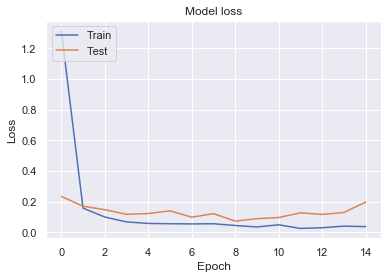

In [9]:
plot_loss(history)

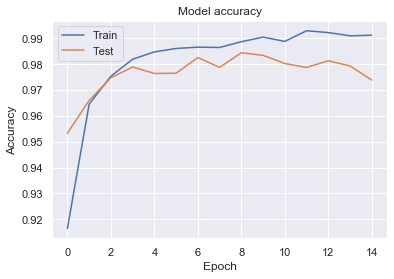

In [10]:
plot_acc(history)

## Making predictions

In [11]:
predictions = pd.read_csv('../data/raw/sample_submission.csv')

In [12]:
predictions

,id,label
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
5,5,5
6,6,5
7,7,5
8,8,5
9,9,5


In [13]:
X_test.drop('id', axis = 1, inplace = True)

In [14]:
preds = model.predict(X_test)

In [15]:
res = pd.DataFrame(preds, columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [16]:
predictions['label'] = res.idxmax(axis = 1)

In [18]:
predictions.to_csv('../output/base_submission.csv')